- Good and catchy title. Use title so that it contains most information about the article in few words.

# Pandas AI: Meet the new AI assistant

#### Introduce Pandas AI and LLMs briefly:

LLMs are language models,
ChatGPT,
Open AI


PandasAI is a Python library that adds Generative AI capabilities to pandas, the popular data analysis and manipulation tool. It is designed to be used in conjunction with pandas, and is not a replacement for it. The library is still under development.

Outline should follow a storytelling structure

Step by step outline of the article(specific to this post):
- Set up open ai account
- Extract api key and import pandas ai
- Download data file
- Answering some questions related to the data using pandas ai
- Limitations of pandas ai
- Conclusion

First you have to create an OpenAI account. To do this go to https://platform.openai.com/ and create an account. Once your account has been made sign in to your account. Once u sign in u would see **Personal** written on the top right side of your screen. Click on it and a dropdown will appear. Click on **View API keys** and there u will see an option to create a new secret key. Once this is done you are all set to use pandas ai in your projects

To use it, first install the pandasai library using pip install
then import PandasAI from pandasai like this 
and now we are all good to go

In [ ]:
# pip install pandasai

In [1]:
import pandas as pd
from pandasai import PandasAI

In [2]:
# Don't include this
data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

For this tutorial I will be using the medical charges data which looks like this:-

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Now for pandas ai to work you have to validate it using your api key. It can be done in the following manner:-

In [5]:
# Instantiate an LLM
from pandasai.llm.openai import OpenAI
llm = OpenAI(api_token=f"{YOUR_API_KEY}")
pandas_ai = PandasAI(llm)

Let's start with the most basic questions about our data

**How many rows and columns are in the data? Also list the names of all the columns.**

I will also be using pandas to check the correctness of AI's answers 

In [5]:
print(data.shape)
print(data.columns)

(1338, 7)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [7]:
prompt = "How many rows and columns are in the data?"
pandas_ai(data, prompt=prompt)

'1338 7'

In [6]:
import numpy as np

In [8]:
# data['charges'].iloc[0] = np.nan

In [19]:
prompt = "How many null values are in the data. Can you also tell which column contains the missing value"
pandas_ai(data, prompt=prompt)

'1 charges'

In [20]:
prompt = "Impute the missing value in the data using the mean value. Output the imputed value."
pandas_ai(data, prompt=prompt)

<string>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


13267.71882330516

In [12]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
# prompt = '''What is the proportion of males to females in the data?
#             Output should look like this [Males: value, Females: value] where value is the answer.
#             Also round the answer to 2 decimal places'''
# pandas_ai(data, prompt=prompt)

'Males: 0.51, Females: 0.49'

<string>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


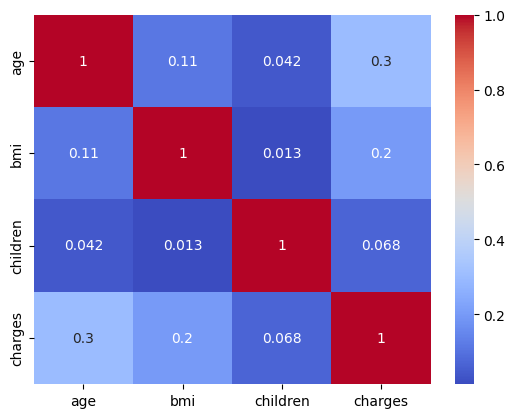

In [14]:
prompt = "Make a heatmap showing the correlation of all the numeric columns in the data"
pandas_ai(data, prompt=prompt)

In [13]:
import seaborn
seaborn.__version__

'0.12.2'

In [18]:
prompt = "Medical charges for which gender is more on average and by how much? Round the answer to 2 decimal places. Provide the answer in form of a sentence."
pandas_ai(data, prompt=prompt)

'On average, charges for male are higher by $1387.17.'

In [19]:
prompt = '''Does smoking causes more charges on average and by how much? 
            Provide the answer in form of a sentence rounded down to 2 decimal places.'''
pandas_ai(data, prompt=prompt)

'Smoking causes an average increase in charges of 23615.96'

In [23]:
prompt = "What are the 5 ages with the lowest average BMI?. Display them in a table."
response = pandas_ai.run(data, prompt=prompt)
print(response)

   Age  Average BMI
0   21    28.185714
1   19    28.596912
2   38    28.996600
3   24    29.142679
4   27    29.333571


In [29]:
prompt = "Which region has the greatest number of smokers and which has the lowest? Provide the answer in form of a sentence. Example output: The region with the greatest number of smokers is {} with {} smokers."
pandas_ai(data, prompt=prompt)

'The region with the greatest number of smokers is southeast with 91 smokers. The region with the lowest number of smokers is southwest with 58 smokers.'

In [31]:
prompt = "What are the average charges of a female living in the north region. Provide the code by which you arrived at the answer?"
pandas_ai(data, prompt=prompt)

12479.870396585367

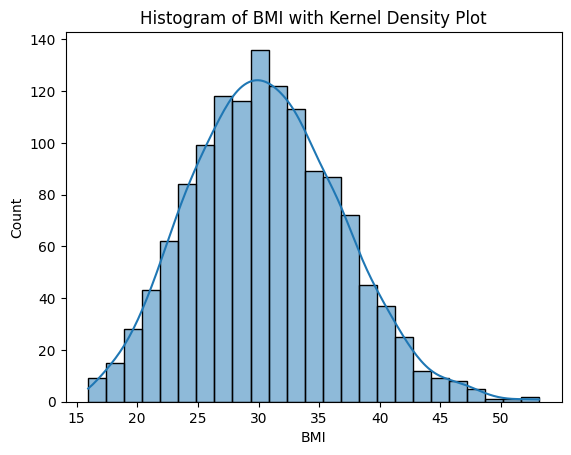

In [17]:
prompt = "Create a histogram of bmi with a kernel density plot."
pandas_ai(data, prompt=prompt)

In [13]:
import matplotlib.pyplot as plt

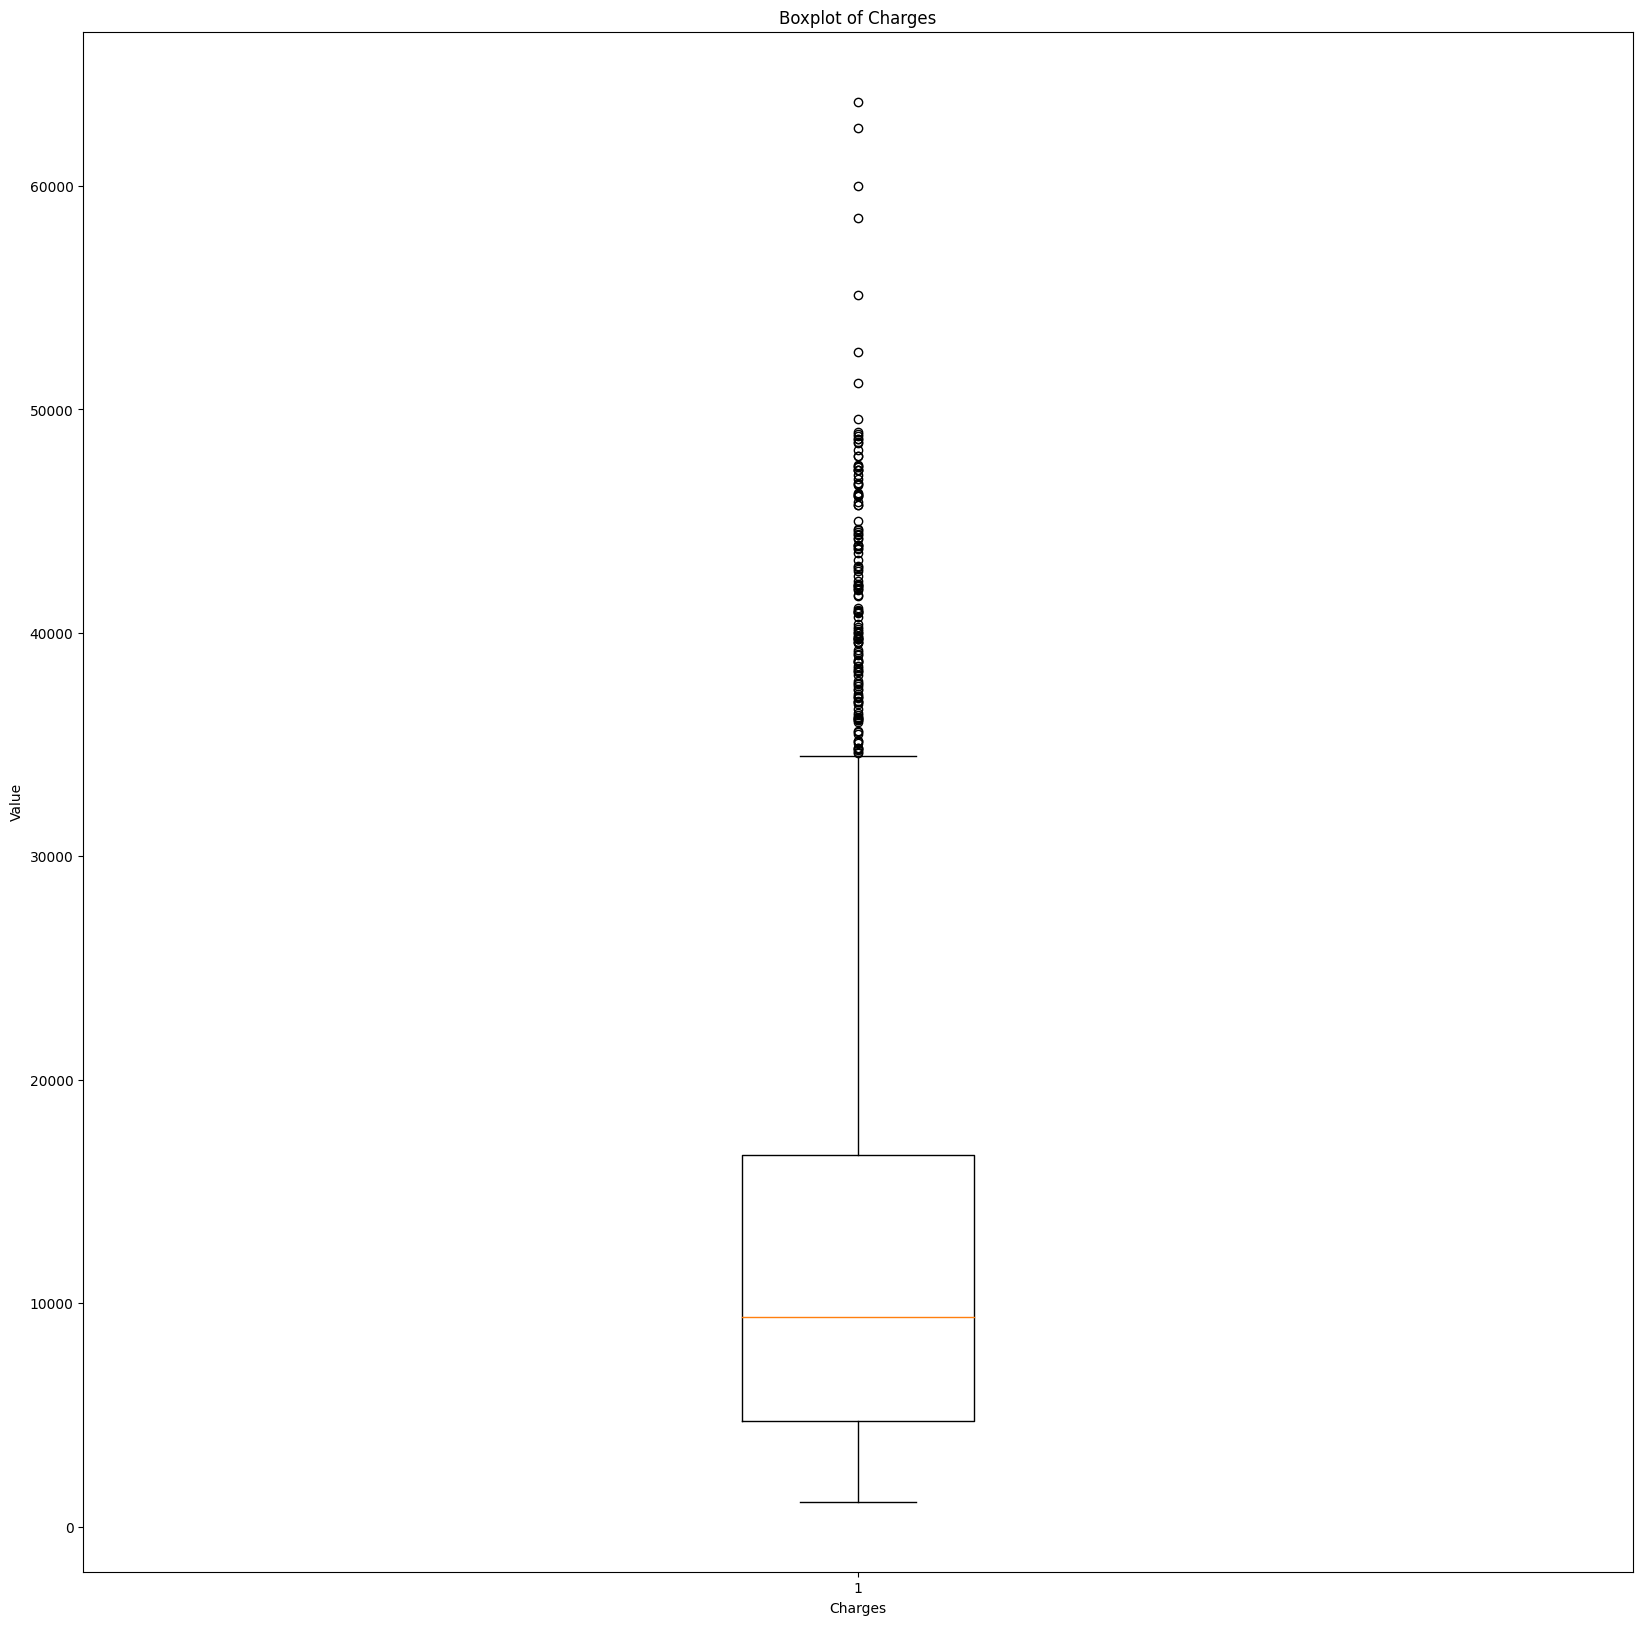

9382.033

In [14]:
plt.figure(figsize=(20,20))
prompt = "Make a boxplot of charges. Output the median value of charges."
pandas_ai(data, prompt=prompt)

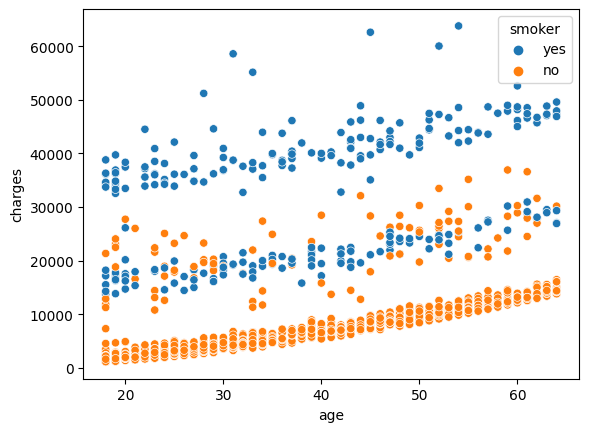

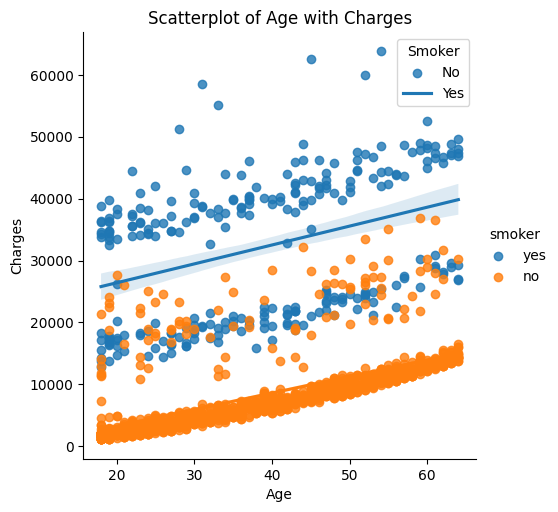

In [15]:
prompt = "Make a scatterplot of age with charges and colorcode using the smoker values. Also provide the legends and add regression lines for both smokers and non-smokers"
pandas_ai(data, prompt=prompt)

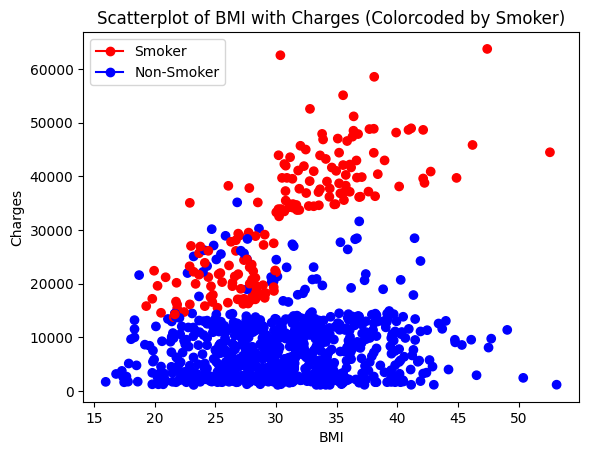

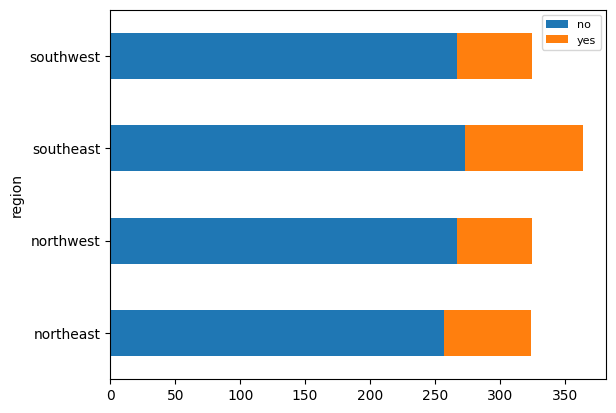

In [12]:
prompt = "Make a horizontal bar chart of region vs smoker. Make the legend smaller."
pandas_ai(data, prompt=prompt)

In [6]:
# prompt = "What task you cannot do with the given data"
pandas_ai.segment_customers(data, features=['sex', 'smoker'], n_clusters=3)

Pandas requires version '1.2.2' or newer of 'sklearn' (version '1.0.2' currently installed).


"Unfortunately, I was not able to answer your question, because of the following error:\n\nPandas requires version '1.2.2' or newer of 'sklearn' (version '1.0.2' currently installed).\n"


In Pandas, you have to perform operations on dataset by typing many lines of code which can be quite time consuming. PandasAI makes this task easier by performing operations on datasets from simple text prompts. It leverages the power of OpenAI LLMs and generates code to perform specified operations on provided datasets.

While PandasAI comes in handy to perform many tasks by simply using a text prompt. It still cannot be used for big data analysis as it still uses dataframe as it’s data structure which has a large overhead causing RAM issues for big data.

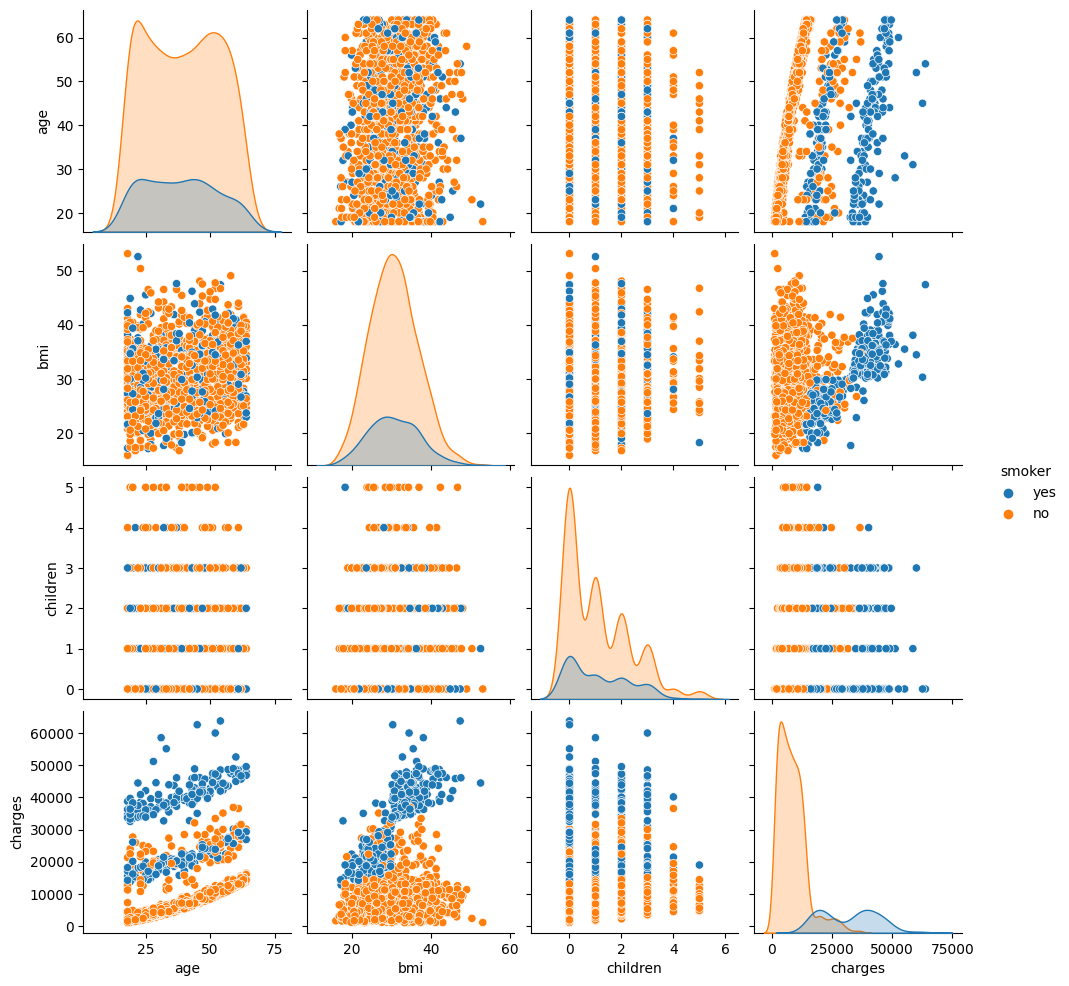

In [24]:
prompt='Perform multivariate analysis.'
pandas_ai.run(data, prompt=prompt)

In [25]:
prompt='Perform univariate analysis.'
pandas_ai.run(data, prompt=prompt)

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Step by step outline of the article (general):
- Set up open ai account
- Extract api key and import pandas ai
- Download data file
- Answering some questions related to the data using pandas ai
- Limitations of pandas ai
- Summary
- future work
- references

For each of the sections above include:
start- explain what you are going to do
middle- Do what u have explained
end- summarize what u have done

## limitations of pandasai
- Computing Resources: Large language models, including those utilized by PandasAI, can be computationally demanding. Training and running these models require significant computational resources, such as high-performance GPUs or specialized hardware. Consequently, organizations or individuals with limited access to such resources may face challenges in effectively utilizing PandasAI for large-scale projects. (can't be used for big data analysis tasks)

- Dataset Bias: Language models like those incorporated in PandasAI are trained on vast amounts of text data from the internet, which can introduce inherent biases present in the training data. These biases can manifest in the generated responses or analyses performed using PandasAI. Care must be taken to understand and mitigate such biases to ensure fair and unbiased results.

- Contextual Limitations: Although LLMs excel at understanding language, they may still struggle with certain contextual nuances. They may occasionally misinterpret ambiguous or contextually complex queries, leading to inaccurate or unexpected results. Users should exercise caution when relying solely on the outputs generated by PandasAI, particularly in critical decision-making scenarios.

## FAQs

**How does PandasAI handle data privacy and security?**
- PandasAI does not store user data or communicate externally during its execution. However, it's essential to handle sensitive data responsibly and ensure compliance with privacy regulations.

**How do PandasAI work under the hood?**
- Pandas AI uses ChatGPT’s API in the backend to generate the code and executes it. The output after execution is returned to you.

**What are some limitations of pandas Ai?**
- above cell

**Can I use PandasAI for my own personal projects?**
- Absolutely! PandasAI is designed to be used for personal projects. It is an open-source library released under the permissive MIT license, which means you have the freedom to use it for your own purposes, modify it according to your needs, and integrate it into your personal projects without any restrictions. Whether you're working on data analysis, natural language processing tasks, or other related projects, PandasAI can be a valuable tool to enhance your workflow and drive insights from textual data.

**Is pandasai a replacement for pandas?**
- While both libraries have their own strengths and use cases, PandasAI adds the ability to integrate LLMs into your data-driven tasks, enabling you to process, analyze, and generate insights from textual data using the power of AI. So, while PandasAI complements pandas in the NLP domain, it does not aim to replace the functionality and versatility of the pandas library for structured data analysis.

**Which LLMs do PandasAI support?**
- PandasAI supports several large language models (LLMs) such as OpenAI, HuggingFace, Google PaLM. You can find the full list here. https://pandas-ai.readthedocs.io/en/latest/llms/

Conclusion:
LLMs are the buzz in the ml world. PandasAI is a new framework for data analysis which uses LLMs

Key Takeaways:


GenAI is capable of producing highly realistic and complex content that mimics human creativity, making it a valuable tool for many industries such as gaming, entertainment, and product design. Recent breakthroughs in the field, such as GPT (Generative Pre-trained Transformer) and Midjourney, have significantly advanced the capabilities of GenAI. These advancements have opened up new possibilities for using GenAI to solve complex problems, create art, and even assist in scientific research.

Generative AI has taken the world by storm, revolutionizing the way we work. From big tech companies to entrepreneurs and digital content creators, everyone is using Generative AI to enhance their productivity and working capabilities manyfold. This has brought a new era in the world of Artificial Intellignece and Machine Learning. Now you can generate new content, talk to an artificial assistant and even create videos and images in just a matter of seconds using this new technology. Underlying this technology are machine learning models that go by the name of Large Language Models or LLMs.



Large language models are type of machine learning models which are trained on a large amount of text data and are capable of generating text in a human-like manner. These models use deep learning techniques to learn the underlying patterns, structures, and nuances of language, allowing them to generate coherent and contextually relevant text. The most well known example of LLMs is ChatGPT which is developed by OpenAI. It uses a Large Language Model called GPT which contain billions of parameters and is trained on a wide range of text data from all over the internet such as articles, news, books etc. It can be used to perform a broad range of tasks from creating original content to writing code. 

In this article we will be learning about PandasAI which is a new tool for making data analysis and visualization tasks easier. PandasAI is built in conjunction to Python's Pandas library and uses generative AI and LLMs in its working. Unlike pandas in which you have to do the full analysis of data manually, PandasAI allows you to generate insights from your data by simply providing a text prompt as if you are talking to your assistant who can do the work for you in a short amount of time. In this article I will be going over the full process of data analysis and visualization using PandasAI with code examples and explanations. So, let's get started. 

How does it work?
- When you execute your prompt using PandasAI, it sends a request to the OpenAI server on which the LLM is hosted. The LLM processes the request and converts the query into appropriate Python code and then use pandas to calculate the answer. It provides the answer back to PandasAI which then outputs it to your computer.